In [2]:
import networkx as nx
import matplotlib.colors
import organoidDatabase
import organoidTools
import collections
import itertools
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import pygraphviz
import numpy as np
import ipywidgets
import glob
import os
from copy import deepcopy
from importlib import reload
reload(organoidDatabase)
reload(organoidTools)
O = organoidDatabase.OrganoidDatabase()

In [3]:
outdir = './figures'
resourceDir = './figures/resources'
if not os.path.exists(outdir):
    os.makedirs(outdir)
if not os.path.exists(resourceDir):
    os.makedirs(resourceDir)

clusteringName = 'singleCellStatesWOchr1_allelic_APKSonly'# 'singleCellStatesWOchr1_allelic'
clusters = O.fetchAsDF(f"SELECT * FROM `singleCellCNVClustering` WHERE embeddingName='{clusteringName}'", index='cellId')

In [11]:
clusters

,cluster,embeddingName
cellId,,
APKS1_10_1-1_cell6,1,singleCellStatesWOchr1_allelic_APKSonly
APKS1_10_1-1_cell62,8,singleCellStatesWOchr1_allelic_APKSonly
APKS1_10_1-1_cell68,2,singleCellStatesWOchr1_allelic_APKSonly
APKS1_10_1-1_cell83,2,singleCellStatesWOchr1_allelic_APKSonly
APKS1_10_1-1_cell88,2,singleCellStatesWOchr1_allelic_APKSonly
APKS1_10_1-2_cell5,2,singleCellStatesWOchr1_allelic_APKSonly
APKS1_10_1-2_cell50,2,singleCellStatesWOchr1_allelic_APKSonly
APKS1_10_1-2_cell58,2,singleCellStatesWOchr1_allelic_APKSonly
APKS1_10_1-2_cell60,2,singleCellStatesWOchr1_allelic_APKSonly


In [12]:
cellInfo = []
for cell in clusters.index:
    
    d = organoidTools.cellToReplicatePassagePlateAndCell(cell)
    cellInfo.append( { 'cellId':cell, 'replicate': d[0], 'passage':d[1], 'plate':d[2], 'cell':d[3],'state':clusters['cluster'][cell] }  )

cellInfo = pd.DataFrame(cellInfo).set_index('cellId')
clusters.index = pd.MultiIndex.from_tuples([ 
    organoidTools.cellToReplicatePassagePlateAndCell(x) for x in clusters.index])
cellInfo.index = pd.MultiIndex.from_tuples([ 
    organoidTools.cellToReplicatePassagePlateAndCell(x) for x in cellInfo.index])
cellInfo = cellInfo.join(clusters)

In [13]:
# Only select APKS samples:
cellInfo = cellInfo.loc[ ['APKS1','APKS2','APKS3']]

In [17]:
cellInfo.to_pickle('../tables/singleCellStatesWOchr1_allelic_APKSonly.pickle.gz')

In [31]:
chromosomeSizes = {x.split()[0]: int(x.split()[1]) for x in """chr1	248956422
chr2	242193529
chr3	198295559
chr4	190214555
chr5	181538259
chr6	170805979
chr7	159345973
chr8	145138636
chr9	138394717
chr10	133797422
chr11	135086622
chr12	133275309
chr13	114364328
chr14	107043718
chr15	101991189
chr16	90338345
chr17	83257441
chr18	80373285
chr19	58617616
chr20	64444167
chr21	46709983
chr22	50818468
chrX	156040895
chrY	57227415
chrM	16569""".split('\n')}

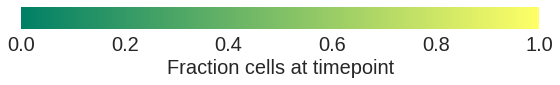

In [32]:

cmap = plt.get_cmap('summer')
fig = plt.figure(figsize=(8, 2))
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20) 
matplotlib.rc('axes', labelsize=20) 
cmap
ax1 = fig.add_axes([0.05, 0.80, 0.9, 0.15])
norm = mpl.colors.Normalize(vmin=0, vmax=1)
cb1 = mpl.colorbar.ColorbarBase(ax1, cmap=cmap,
                                norm=norm,
                                orientation='horizontal')
cb1.set_label('Fraction cells at timepoint')
fractionColorScalePath = f'{resourceDir}/fraction_color_scale.png'
plt.savefig(fractionColorScalePath, dpi=300)

fractionColorScalePath = fractionColorScalePath.replace(outdir,'.')

plt.show()


In [33]:
cellInfo.index.levels[0]

Index(['APKS1', 'APKS2', 'APKS3'], dtype='object')

In [34]:
generalPlotOffset = (50, 50)

gray=220


replicateMatrixPlot = bdbplot.BDBPlot()
rp = replicateMatrixPlot

baseLineCenterAv = ('dominant-baseline','central')

replicateMapping = [
    ('APKS1','Replicate 1'), 
    ('APKS2','Replicate 2'),  
    ('APKS3','Replicate 3'),  
    #('A3','Replicate 4'), 
    #('AP1','Replicate 5')
]

replicates={ origin:target  for origin,target in replicateMapping if cellInfo.loc[origin].shape[0]>0}

g = replicateMatrixPlot.getGroup('main')


smallFontSize = '6' 
bigFontSize = '10' 

heightPerState = 10
cellWidth = 10
cellSpacing = 1
stateMargin = 1
replicateMargin = 10
headingMargin = 20

plottedMatrix = collections.defaultdict(dict)

# Identify starting points of every passage column:
columnStarts = {}
x = 0
for replicate in replicates:
    for passage in sorted(cellInfo[cellInfo['replicate']==replicate]['passage'].unique()):
        columnStarts[(replicate,passage )] = x
        x+=cellWidth + cellSpacing
    x+=replicateMargin

    
for i,(replicate, replicateDisplayName) in enumerate(replicates.items()):
    y = -headingMargin
    coords = [(passage,x) for ((rp,passage),x ) in columnStarts.items() if rp==replicate]
    x = np.mean([ x for _,x in coords])+0.5*cellWidth
    xStart = np.min([ x for _,x in coords]) #
    xEnd = np.max([ x for _,x in coords])+cellWidth
    center = xStart + (xEnd-xStart)*0.5
    ## Replicate heading
    text = replicateMatrixPlot.getText(str(replicateDisplayName), center, y )
    text.set('text-anchor','middle')
    #text.set(*baseLineCenterAv)
    text.set('alignment-baseline','middle')
    
    text.set('font-family','Helvetica')
    text.set('textLength','30')
    text.set('font-size',smallFontSize)
    g.append(text)
    
    ## Anchors:
    anchorHeight = 2
    y += cellWidth*0.5
    path  = rp.getPath(
                       rp.getPathDefinition([
                           (xStart,y+anchorHeight),
                           (xStart,y),
                           (xEnd,y),
                           (xEnd,y+anchorHeight),
                       ], True))

    rp.modifyStyle(path, {'stroke-width':'0.5', 'stroke-linecap':'round'} )
    g.append( path )

    y = -cellWidth
    if i==0:
        text = replicateMatrixPlot.getText('Passage' , -cellWidth, y+0.5*cellWidth )
        text.set('text-anchor','end')
        text.set(*baseLineCenterAv)
        text.set('font-family','Helvetica')
        text.set('font-size',smallFontSize)
        g.append(text)

    for passage,x in coords:
        text = replicateMatrixPlot.getText(str(passage), x+0.5*cellWidth, y+0.5*cellWidth )
        text.set('text-anchor','middle')
        text.set(*baseLineCenterAv)
        text.set('font-family','Helvetica')
        text.set('font-size',smallFontSize)
        g.append(text)

text = replicateMatrixPlot.getText('Copy number state' , 
                                   -10, 
                                   0.5*len(cellInfo['state'].unique())*(heightPerState+stateMargin))
text.set('text-anchor','middle')
text.set(*baseLineCenterAv)
text.set('font-family','Helvetica')
text.set('font-size',bigFontSize)
replicateMatrixPlot.setTextRotation(text,270)
g.append(text)

        
y = 0
for stateIndex,state in enumerate(sorted(cellInfo['state'].unique())):
    
    # Zebra fill:
    if stateIndex%2==0:
        
        x = min( columnStarts.values() )
        width = cellWidth +max( columnStarts.values() ) - x + 30
        rect = replicateMatrixPlot.getRectangle( x, y, width, cellWidth)
        rect.set('style',"fill:rgb(%s,%s,%s);stroke:none" % (gray, gray, gray))
        g.append(rect)

    for replicate in replicates:
        df = cellInfo[cellInfo['replicate']==replicate]
        for passage in sorted(df['passage'].unique()):
            dfs = df[np.logical_and( df['passage']==passage,  df['state']==state)]
            totalCellsAtThisPassage = sum(df['passage']==passage)
            if dfs.shape[0]>0:
                #print(state, replicate, passage, dfs.shape[0])
                x = columnStarts[(replicate,passage )]
                rect = replicateMatrixPlot.getRectangle( x, y, cellWidth, cellWidth)
                ratio = dfs.shape[0]/totalCellsAtThisPassage
                
                plottedMatrix[(replicate,passage,state)] =  {'ratio':ratio, 'cellCount':dfs.shape[0]}
                #print(ratio, cmap(ratio+0.5))
                color = tuple(int(c*255) for c in cmap(ratio)[:3])
                rect.set('style',"fill:rgb(%s,%s,%s);stroke:none" % color)
                g.append(rect)
                text = replicateMatrixPlot.getText(str(dfs.shape[0]), x+0.5*cellWidth, y+0.5*cellWidth )
                text.set('text-anchor','middle')
                text.set(*baseLineCenterAv)
                text.set('font-family','Helvetica')
                text.set('font-size', smallFontSize )#str( float(smallFontSize) - len(str(dfs.shape[0]))))
                # White text when cell is dark:
                if sum(color)<350:
                    text.set('fill','#FFFFFF')
                g.append(text)
                
    y+= heightPerState + stateMargin
y-= heightPerState + stateMargin
# Vertical zebra fill:
prevX = None
verticalZebraRatio = 0.4
for i,replicate in enumerate(replicates):
    coords = [start for (rep,pas),start in  columnStarts.items() if rep==replicate]
    start,end =min(coords), max(coords)+cellWidth
    if prevX != None:
        padding = (start-prevX) * (1-verticalZebraRatio) * 0.5
        width = (start-prevX) * verticalZebraRatio
        rect = replicateMatrixPlot.getRectangle( prevX+padding, 0,width, y )
        rect.set('style',"fill:rgb(%s,%s,%s);stroke:none; opacity:0.7" % (255, 255, 255))
        g.append(rect)
    
    prevX = end
    



barHeight = 35
img = rp.getImage(fractionColorScalePath, 
                  width= max(columnStarts.values())+1.5*cellWidth, 
                  height=barHeight,
                  preserveAspectRatio='none',
                  x=0, y=y+cellWidth)
g.append(img)
g.set('transform' ,"translate(%s,%s)" % generalPlotOffset)
replicateMatrixPlot.setWidth( max(columnStarts.values())+100+cellWidth*2)
replicateMatrixPlot.setHeight(y+100+cellWidth*2+barHeight)
replicateMatrixPlot.write(f'{outdir}/matrix.svg')

offset =  (max(columnStarts.values())+generalPlotOffset[0]+cellWidth, generalPlotOffset[1])

In [35]:
pd.DataFrame.from_dict(plottedMatrix).transpose().to_pickle('../tables/stateToCellRatios.pickle.gz')

In [36]:
import copyNumberStatePlotter
reload(copyNumberStatePlotter)
 
sp = copyNumberStatePlotter.StatePlotter()
df = O.fetchAsDF(f'SELECT * FROM `stateCopyNumber` where clusteringName="{clusteringName}"')
df = df[df['cluster'] .isin( cellInfo['state'].unique() )]
# Drop bins where nothing happens
plotStates = [
    (binIndex, chromosome) for (binIndex, chromosome),group 
    in df.groupby( ['binIndex','chromosome']) if ( len( set(group['copyNumber']) )>1 or 
                                                  chromosome.endswith('_A') or chromosome.endswith('_B'))
]


subSelect = pd.DataFrame([ row for idx, row in df.iterrows() if (row.binIndex, row.chromosome) in plotStates])


plot = deepcopy(replicateMatrixPlot)
sp.canvas = plot
canvas = sp.plotStates(  subSelect, offset, logScale=True, logRepeats=True, chromosomeSizes=chromosomeSizes  )
canvas.write(f'{outdir}/figure2_log.svg')

plot = deepcopy(replicateMatrixPlot)
sp.canvas = plot
canvas = sp.plotStates(  subSelect , offset )
canvas.write(f'{outdir}/figure2.svg')


chr2
chr3
chr4_A
chr7
chr8
chr9
chr10
chr12
chr13
chr14
chr15
chr17
chr18_A
chr20
chr21
chr22
chrX
chr2
chr3
chr4_A
chr7
chr8
chr9
chr10
chr12
chr13
chr14
chr15
chr17
chr18_A
chr20
chr21
chr22
chrX


'./figures/figure2.svg'